In [48]:
%%capture
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()



from ultralytics import YOLO
from IPython.display import display, Image

from google.colab.patches import cv2_imshow

In [49]:
model = YOLO('/content/model.pt')

In [50]:
import json
import cv2
import os
from google.colab.patches import cv2_imshow
import shutil

In [51]:
def remove_directory(directory):
    # Check if the directory exists
    if os.path.exists(directory):
        # Remove the entire directory and its contents
        shutil.rmtree(directory)

/content/download.jpg
2023-12-10 07:44:40.874589: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:44:40.874642: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:44:40.874682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:44:41.783285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/download.jpg: 704x1024 1 drowning, 259.7ms
Speed: 2.4ms

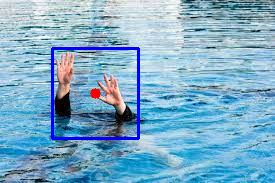

In [86]:

def detection(imgpath,confidence):
    print(imgpath)
    # remove previous prediction
    remove_directory('/content/runs/detect/predict')

    # Extract the filename from the provided imgpath
    filename = os.path.basename(imgpath)

    # Update paths using the filename
    image_path = imgpath

    # Run YOLO detection with the corrected paths for labels and image
    !yolo task=detect mode=predict model=/content/model.pt conf={confidence} source={imgpath} save=True save_txt=True

    # Update the labels_path to point to the correct labels file
    labels_path = '/content/runs/detect/predict/labels/' + os.path.splitext(os.path.basename(imgpath))[0] + '.txt'

    if os.path.exists(labels_path):
        with open(labels_path) as f:
            lines = f.readlines()

        # Load the image
        image = cv2.imread(imgpath)

        for line in lines:
            class_label, x_center, y_center, width, height = map(float, line.split())
            print(class_label)

            if class_label == 0:
                # Calculate the coordinates of the bounding box
                x1 = int((x_center - width / 2) * image.shape[1])
                y1 = int((y_center - height / 2) * image.shape[0])
                x2 = int((x_center + width / 2) * image.shape[1])
                y2 = int((y_center + height / 2) * image.shape[0])

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle

                # Calculate the center of the bounding box
                center_x = (x1 + x2) // 2
                center_y = (y1 + y2) // 2

                # Draw a circle at the center of the bounding box
                cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)

            else:
                # Display "Not Detected" message for other class labels
                cv2.putText(image, 'Not Drowning', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)

        # Display the image with detected objects
        cv2_imshow( image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


#Pass path of images to detection method
detection('/content/download.jpg',0.4)


In [77]:
detection('/content/s6.jpg',0.4)

/content/s6.jpg
2023-12-10 07:34:15.532888: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:34:15.532949: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:34:15.532973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:34:16.418743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/s6.jpg: 832x1024 295.9ms
Speed: 2.9ms pre-process, 295.9ms in

/content/1.jpg
2023-12-10 07:24:51.343361: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:24:51.343414: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:24:51.343438: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:24:52.397146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/1.jpg: 704x1024 1 drowning, 367.1ms
Speed: 2.6ms pre-process, 

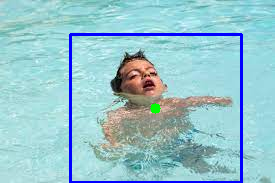

In [57]:
detection('/content/1.jpg',0.4)

/content/s5.jpg
2023-12-10 07:32:23.211553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:32:23.211612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:32:23.211647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:32:24.116934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/s5.jpg: 864x1024 1 swimming, 309.9ms
Speed: 2.9ms pre-process

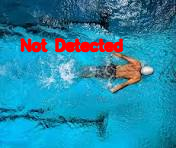

In [73]:
detection('/content/s5.jpg',0.4)

In [74]:
detection('/content/s3.jpg',0.4)

/content/s3.jpg
2023-12-10 07:33:21.914632: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:33:21.914690: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:33:21.914733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:33:22.812470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/s3.jpg: 832x1024 303.2ms
Speed: 2.9ms pre-process, 303.2ms in

/content/sw2.jpg
2023-12-10 07:44:48.116556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:44:48.116616: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:44:48.116646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:44:49.300165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/sw2.jpg: 704x1024 1 swimming, 284.8ms
Speed: 3.1ms pre-proce

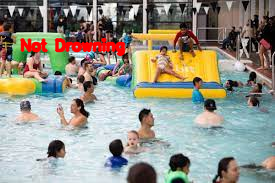

In [87]:
detection('/content/sw2.jpg',0.4)